## Prueba #0502

### "Reconocimiento de actividad humana" 

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Realizar la EDA.
- Realizar el preprocesamiento de los datos.
- Optimice y pruebe un modelo predictivo de su elección.

In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias.
%matplotlib inline

#### Leer los datos:
La explicación sobre el conjunto de datos se puede encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [3]:
# Ir al directorio dónde se ecuentra el fichero 
os.chdir(r'./Data')                # Reemplazar por la ruta adecuada

In [4]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [5]:
df.shape

(19622, 160)

In [6]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

In [7]:
df.head()

Unnamed: 0 user_name  raw_timestamp_part_1  raw_timestamp_part_2  \
0           1  carlitos            1323084231                788290   
1           2  carlitos            1323084231                808298   
2           3  carlitos            1323084231                820366   
3           4  carlitos            1323084232                120339   
4           5  carlitos            1323084232                196328   

     cvtd_timestamp new_window  num_window  roll_belt  pitch_belt  yaw_belt  \
0  05/12/2011 11:23         no          11       1.41        8.07     -94.4   
1  05/12/2011 11:23         no          11       1.41        8.07     -94.4   
2  05/12/2011 11:23         no          11       1.42        8.07     -94.4   
3  05/12/2011 11:23         no          12       1.48        8.05     -94.4   
4  05/12/2011 11:23         no          12       1.48        8.07     -94.4   

   ...  gyros_forearm_x gyros_forearm_y gyros_forearm_z accel_forearm_x  \
0  ...             0.03            0.00           -0.02             192   
1  ...             0.02            0.00           -0.02             192   
2  ...             0.03           -0.02            0.00             196   
3  ...             0.02           -0.02            0.00             189   
4  ...             0.02            0.00           -0.02             189   

  accel_forearm_y accel_forearm_z magnet_forearm_x  magnet_forearm_y  \
0             203            -215              -17             654.0   
1             203            -216              -18             661.0   
2             204            -213              -18             658.0   
3             206            -214              -16             658.0   
4             206            -214              -17             655.0   

   magnet_forearm_z classe  
0             476.0      A  
1             473.0      A  
2             469.0      A  
3             469.0      A  
4             473.0      A  

[5 rows x 160 columns]

1). Realice la EDA. Compruebe los valores faltantes. SUGERENCIA: La variable de respuesta es 'clase'.

In [8]:
#EDA significa Exploratory Data Analysis
print(df.isnull().sum().sum()) #Nos da la cantidad de NaN en el dataset


1921600


In [9]:
df.isnull()

Unnamed: 0  user_name  raw_timestamp_part_1  raw_timestamp_part_2  \
0           False      False                 False                 False   
1           False      False                 False                 False   
2           False      False                 False                 False   
3           False      False                 False                 False   
4           False      False                 False                 False   
...           ...        ...                   ...                   ...   
19617       False      False                 False                 False   
19618       False      False                 False                 False   
19619       False      False                 False                 False   
19620       False      False                 False                 False   
19621       False      False                 False                 False   

       cvtd_timestamp  new_window  num_window  roll_belt  pitch_belt  \
0               False       False       False      False       False   
1               False       False       False      False       False   
2               False       False       False      False       False   
3               False       False       False      False       False   
4               False       False       False      False       False   
...               ...         ...         ...        ...         ...   
19617           False       False       False      False       False   
19618           False       False       False      False       False   
19619           False       False       False      False       False   
19620           False       False       False      False       False   
19621           False       False       False      False       False   

       yaw_belt  ...  gyros_forearm_x  gyros_forearm_y  gyros_forearm_z  \
0         False  ...            False            False            False   
1         False  ...            False            False            False   
2         False  ...            False            False            False   
3         False  ...            False            False            False   
4         False  ...            False            False            False   
...         ...  ...              ...              ...              ...   
19617     False  ...            False            False            False   
19618     False  ...            False            False            False   
19619     False  ...            False            False            False   
19620     False  ...            False            False            False   
19621     False  ...            False            False            False   

       accel_forearm_x  accel_forearm_y  accel_forearm_z  magnet_forearm_x  \
0                False            False            False             False   
1                False            False            False             False   
2                False            False            False             False   
3                False            False            False             False   
4                False            False            False             False   
...                ...              ...              ...               ...   
19617            False            False            False             False   
19618            False            False            False             False   
19619            False            False            False             False   
19620            False            False            False             False   
19621            False            False            False             False   

       magnet_forearm_y  magnet_forearm_z  classe  
0                 False             False   False  
1                 False             False   False  
2                 False             False   False  
3                 False             False   False  
4                 False             False   False  
...                 ...               ...     ...  
19617             False    

#### Se puede calcular por fila

In [10]:
for i in range(int(len(df.index)/50)) :
    print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())
    #if (df.iloc[i].isnull().sum() > 100):
    #    print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())

Nan in row  0  :  100
Nan in row  1  :  100
Nan in row  2  :  100
Nan in row  3  :  100
Nan in row  4  :  100
Nan in row  5  :  100
Nan in row  6  :  100
Nan in row  7  :  100
Nan in row  8  :  100
Nan in row  9  :  100
Nan in row  10  :  100
Nan in row  11  :  100
Nan in row  12  :  100
Nan in row  13  :  100
Nan in row  14  :  100
Nan in row  15  :  100
Nan in row  16  :  100
Nan in row  17  :  100
Nan in row  18  :  100
Nan in row  19  :  100
Nan in row  20  :  100
Nan in row  21  :  100
Nan in row  22  :  100
Nan in row  23  :  0
Nan in row  24  :  100
Nan in row  25  :  100
Nan in row  26  :  100
Nan in row  27  :  100
Nan in row  28  :  100
Nan in row  29  :  100
Nan in row  30  :  100
Nan in row  31  :  100
Nan in row  32  :  100
Nan in row  33  :  100
Nan in row  34  :  100
Nan in row  35  :  100
Nan in row  36  :  100
Nan in row  37  :  100
Nan in row  38  :  100
Nan in row  39  :  100
Nan in row  40  :  100
Nan in row  41  :  100
Nan in row  42  :  100
Nan in row  43  :  100


Existen rows con 100 NaN y otras con 0 NaN, que es el 62,5% de los valores perdidos por cada row.

#### Se puede calcular por columna

In [11]:
miss_values_count = df.isnull().sum()
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

kurtosis_roll_belt      19216
kurtosis_picth_belt     19216
kurtosis_yaw_belt       19216
skewness_roll_belt      19216
skewness_roll_belt.1    19216
                        ...  
stddev_pitch_forearm    19216
var_pitch_forearm       19216
avg_yaw_forearm         19216
stddev_yaw_forearm      19216
var_yaw_forearm         19216
Length: 100, dtype: int64


Tienendo en cuenta nuestro shape, 19216 sobre 19622 es el 97,9%

2). Elimine las columnas que tengan más del 97% de valores perdidos.

In [12]:
miss_values_count

kurtosis_roll_belt      19216
kurtosis_picth_belt     19216
kurtosis_yaw_belt       19216
skewness_roll_belt      19216
skewness_roll_belt.1    19216
                        ...  
stddev_pitch_forearm    19216
var_pitch_forearm       19216
avg_yaw_forearm         19216
stddev_yaw_forearm      19216
var_yaw_forearm         19216
Length: 100, dtype: int64

In [13]:
for column in df.columns:
    na_ratio = ((df[column].isnull().sum() / len(df))*100)
    if (na_ratio > 97):
        df = df.drop(column, axis = 1)

In [14]:
df.head()

Unnamed: 0 user_name  raw_timestamp_part_1  raw_timestamp_part_2  \
0           1  carlitos            1323084231                788290   
1           2  carlitos            1323084231                808298   
2           3  carlitos            1323084231                820366   
3           4  carlitos            1323084232                120339   
4           5  carlitos            1323084232                196328   

     cvtd_timestamp new_window  num_window  roll_belt  pitch_belt  yaw_belt  \
0  05/12/2011 11:23         no          11       1.41        8.07     -94.4   
1  05/12/2011 11:23         no          11       1.41        8.07     -94.4   
2  05/12/2011 11:23         no          11       1.42        8.07     -94.4   
3  05/12/2011 11:23         no          12       1.48        8.05     -94.4   
4  05/12/2011 11:23         no          12       1.48        8.07     -94.4   

   ...  gyros_forearm_x  gyros_forearm_y  gyros_forearm_z  accel_forearm_x  \
0  ...             0.03             0.00            -0.02              192   
1  ...             0.02             0.00            -0.02              192   
2  ...             0.03            -0.02             0.00              196   
3  ...             0.02            -0.02             0.00              189   
4  ...             0.02             0.00            -0.02              189   

   accel_forearm_y  accel_forearm_z  magnet_forearm_x  magnet_forearm_y  \
0              203             -215               -17             654.0   
1              203             -216               -18             661.0   
2              204             -213               -18             658.0   
3              206             -214               -16             658.0   
4              206             -214               -17             655.0   

   magnet_forearm_z  classe  
0             476.0       A  
1             473.0       A  
2             469.0       A  
3             469.0       A  
4             473.0       A  

[5 rows x 60 columns]

In [15]:
miss_values_count = df.isnull().sum()
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

Series([], dtype: int64)


3). Elimine de las columnas innecesarias. SUGERENCIA: Aquellas columnas con "time" en el nombre y aquellas que obviamente son innecesarias.

In [16]:
for column in df.columns:
    if "time" in column:
        df = df.drop(column, axis = 1)

In [17]:
df.head()

Unnamed: 0 user_name new_window  num_window  roll_belt  pitch_belt  \
0           1  carlitos         no          11       1.41        8.07   
1           2  carlitos         no          11       1.41        8.07   
2           3  carlitos         no          11       1.42        8.07   
3           4  carlitos         no          12       1.48        8.05   
4           5  carlitos         no          12       1.48        8.07   

   yaw_belt  total_accel_belt  gyros_belt_x  gyros_belt_y  ...  \
0     -94.4                 3          0.00          0.00  ...   
1     -94.4                 3          0.02          0.00  ...   
2     -94.4                 3          0.00          0.00  ...   
3     -94.4                 3          0.02          0.00  ...   
4     -94.4                 3          0.02          0.02  ...   

   gyros_forearm_x  gyros_forearm_y  gyros_forearm_z  accel_forearm_x  \
0             0.03             0.00            -0.02              192   
1             0.02             0.00            -0.02              192   
2             0.03            -0.02             0.00              196   
3             0.02            -0.02             0.00              189   
4             0.02             0.00            -0.02              189   

   accel_forearm_y  accel_forearm_z  magnet_forearm_x  magnet_forearm_y  \
0              203             -215               -17             654.0   
1              203             -216               -18             661.0   
2              204             -213               -18             658.0   
3              206             -214               -16             658.0   
4              206             -214               -17             655.0   

   magnet_forearm_z  classe  
0             476.0       A  
1             473.0       A  
2             469.0       A  
3             469.0       A  
4             473.0       A  

[5 rows x 57 columns]

In [18]:
for column in df.columns:
    li = list(df[column].value_counts())
    if (len(li) < 10):
        print(column)
        print(len(li))

user_name
6
new_window
2
classe
5


Comprobamos aquellas columnas que tengan menos de 10 valores distintos, son tres de las cuales quitaría user_name, ya que no es importante el nombre del usuario, la siguiente es un boolean por lo tanto solo puede tener dos opciones y la tercera es la clase del usuario.

4). Codifique la etiqueta de la variable de respuesta. SUGERENCIA: use preprocessing.LabelEncoder ().

In [19]:
le = preprocessing.LabelEncoder()
df['user_name'] = le.fit_transform(df['user_name'])
df['new_window'] = le.fit_transform(df['new_window'])
df['classe'] = le.fit_transform(df['classe'])

In [20]:
df

Unnamed: 0  user_name  new_window  num_window  roll_belt  pitch_belt  \
0               1          1           0          11       1.41        8.07   
1               2          1           0          11       1.41        8.07   
2               3          1           0          11       1.42        8.07   
3               4          1           0          12       1.48        8.05   
4               5          1           0          12       1.48        8.07   
...           ...        ...         ...         ...        ...         ...   
19617       19618          0           0         864     147.00      -34.80   
19618       19619          0           0         864     145.00      -35.30   
19619       19620          0           0         864     145.00      -35.50   
19620       19621          0           0         864     143.00      -35.90   
19621       19622          0           1         864     143.00      -36.00   

       yaw_belt  total_accel_belt  gyros_belt_x  gyros_belt_y  ...  \
0         -94.4                 3          0.00          0.00  ...   
1         -94.4                 3          0.02          0.00  ...   
2         -94.4                 3          0.00          0.00  ...   
3         -94.4                 3          0.02          0.00  ...   
4         -94.4                 3          0.02          0.02  ...   
...         ...               ...           ...           ...  ...   
19617     129.0                21          0.37         -0.02  ...   
19618     130.0                19          0.39         -0.02  ...   
19619     130.0                19          0.37          0.00  ...   
19620     131.0                18          0.37         -0.02  ...   
19621     132.0                18          0.35         -0.02  ...   

       gyros_forearm_x  gyros_forearm_y  gyros_forearm_z  accel_forearm_x  \
0                 0.03             0.00            -0.02              192   
1                 0.02             0.00            -0.02              192   
2                 0.03            -0.02             0.00              196   
3                 0.02            -0.02             0.00              189   
4                 0.02             0.00            -0.02              189   
...                ...              ...              ...              ...   
19617             1.73            -1.75            -0.25             -271   
19618             1.59            -1.36             0.00             -271   
19619             1.54            -1.20             0.05             -263   
19620             1.48            -0.90             0.05             -270   
19621             1.38            -0.64             0.08             -278   

       accel_forearm_y  accel_forearm_z  magnet_forearm_x  magnet_forearm_y  \
0                  203             -215               -17             654.0   
1                  203             -216               -18             661.0   
2                  204             -213               -18             658.0   
3                  206             -214               -16             658.0   
4                  206             -214               -17             655.0   
...                ...              ...               ...               ...   
19617              -68              -37              -205            -587.0   
19618              -91              -43              -151            -635.0   
19619              -99              -45              -116            -654.0   
19620             -141              -51               -68            -678.0   
19621             -159              -52               -60            -686.0   

       magnet_forearm_z  classe  
0                 476.0       0  
1                 473.0       0  
2                 469.0       0  
3                 469.0       0  
4                 473.0       0  
...                 ...     ...  
19617               6.0       4  
19618             -36.0       4  
19619             -70.0       4  
196

5). Realizar escalado min-max de las variables exploratorias. SUGERENCIA: utilice preprocesamiento.MinMaxScaler ().

In [31]:
scaler = preprocessing.MinMaxScaler().fit_transform(df.drop(columns = ['user_name', 'classe']))

6). Elija un algoritmo y realice el análisis predictivo.
- Optimizar el (los) hiperparámetro (s)
- Calcule la precisión.
- Consiga una precisión superior al 90%.

In [36]:
# Obtenemos X e y para la parte de train
X_train = df.drop(columns = ['user_name', 'classe'])
y_train = df["user_name"]

# Obtenemos X e y para la parte de test
y_test = df['user_name']
X_test = df.drop(columns = ['user_name', 'classe'])

#X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size = 0.25, random_state = 0)


K Nearest Neighbors Classifier accuracy: 99.97961471817348%
Random Forest Classifier accuracy: 100.0%


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

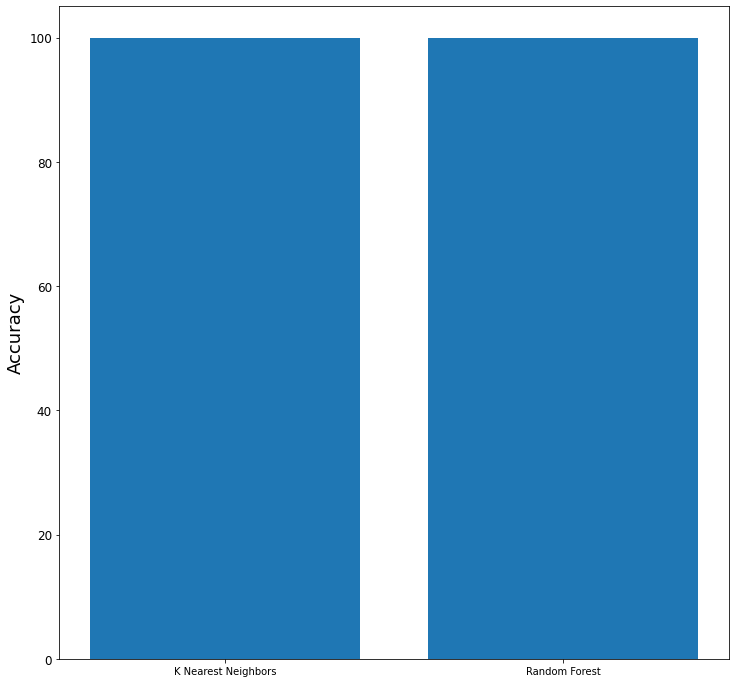

In [51]:
from sklearn.metrics import accuracy_score

accuracy_scores = np.zeros(2)

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[1]))

plt.figure(figsize=(12,12))
labels = ['K Nearest Neighbors', 'Random Forest']
plt.bar(labels,accuracy_scores)
plt.ylabel('Accuracy',fontsize=18)
plt.yticks(fontsize=12)